In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!pip install openpyxl

In [21]:
# read excel file using pandas
df = pd.read_csv('res/measurements.csv')
# get all unique values of 'NameOfMeasurement' column
measurements = df['NameOfMeasurement'].unique()
# remove nans from measurements
measurements = measurements[~pd.isnull(measurements)]
# iterate over measurements
ctrl = []
ctrl_times = []

Isl1CKO = []
Isl1CKO_times = []

for measurement in measurements:
    # get df for current measurement
    df_measurement = df[df['NameOfMeasurement'] == measurement]
    # get Time(sec) column
    time = df_measurement['Time'].values
    path = df_measurement['CoordinateOfTip'].values
    new_path = []
    for x in path:
        # convert string to list of floats
        x = x.split('[')[1].split(']')[0].split(' ')
        coord = []
        for i in x:
            try:
                coord.append(float(i))
            except:
                continue
        new_path.append(coord)
    new_path = np.array(new_path)
    # if column Genotype is control, save to ctrl
    if df_measurement['Genotype'].values[0] == 'control':
        ctrl.append(new_path)
        ctrl_times.append(np.array(time))
    # if column Genotype is Isl1CKO, save to Isl1CKO
    elif df_measurement['Genotype'].values[0] == 'lsl1CKO':
        Isl1CKO.append(new_path)
        Isl1CKO_times.append(np.array(time))
# print(Isl1CKO_times[5])

In [22]:
# make a function that would normalize rotation between axons
def normalize_rotation(array):
    # normalize each subarray to start at 0,0
    array = [a - a[0] for a in array]
    # for each subarray, find the angle between the first and last point
    rotated_array = []
    for i, a in enumerate(array):
        # if any element of a is negative, flip the vector
        # remove the negative sign in the y axis
        a[:,0] = np.abs(a[:,0])
        x = [0,1]
        y = [np.mean(a[:,0]), np.mean(a[:,1])]
        y = y / np.linalg.norm(y)
        theta = np.arccos(x @ y)
        angle = np.degrees(theta)
        # construct a rotation matrix to rotate the subarray by that angle
        c, s = np.cos(theta), np.sin(theta)
        R = np.array(((c, -s), (s, c)))
        # rotate the subarray
        a = R @ a.T
        rotated_array.append(a.T)
    return rotated_array

In [23]:
df

,Genotype,NameOfMeasurement,Time,CoordinateOfTip,Axon length ($\mu m$),Speed from $t_{i-1}$ to $t_{i}$ ($\mu m / \text{sec}$),Axon growth distance from $t_{i-1}$ to $t_{i}$ ($\mu m$),Angle change from $t_{i-1}$ to $t_{i}$ (%),Total growth during all time ($\mu m$),Total speed during all time ($\mu m / \text{sec}$),Total angle change (%)
0,lsl1CKO,SNT-k-c-3-25102022,0,[-65.81378 40.14982],0.000000,0.000000,0.000000,180.000000,NaN,NaN,NaN
1,lsl1CKO,SNT-k-c-3-25102022,1,[-73.68405 49.8451 ],12.487578,12.487578,12.487578,NaN,NaN,NaN,NaN
2,lsl1CKO,SNT-k-c-3-25102022,2,[-92.27616 60.90911],33.633401,21.635130,21.635130,20.175059,NaN,NaN,NaN
3,lsl1CKO,SNT-k-c-3-25102022,3,[-113.37763 78.01841],60.797615,27.166159,27.166159,8.278988,NaN,NaN,NaN
4,lsl1CKO,SNT-k-c-3-25102022,4,[-118.16824 83.83557],68.186760,7.535867,7.535867,11.491982,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
403,control,SNT-c-a-2-08112022,3,[-78.46694 72.62963],56.272618,24.787226,24.787226,5.015743,56.272618,14.068154,8.552596
404,control,SNT-c-e-5-10112022,0,[ 27.15594 -44.07723],0.000000,0.000000,0.000000,180.000000,NaN,NaN,NaN
405,control,SNT-c-e-5-10112022,1,[ 39.16459 -55.6765 ],16.695830,16.695830,16.695830,NaN,NaN,NaN,NaN
406,control,SNT-c-e-5-10112022,2,[ 55.40357 -66.45699],36.038622,19.491625,19.491625,10.427755,NaN,NaN,NaN


In [27]:
rotated_ctrl = normalize_rotation(ctrl)
rotated_lsl1CKO = normalize_rotation(Isl1CKO)
print(rotated_lsl1CKO)

[array([[ 0.00000000e+00,  0.00000000e+00],
       [-2.39779819e+00,  1.22552098e+01],
       [ 1.02571637e+00,  3.36177570e+01],
       [ 1.41719453e+00,  6.07810949e+01],
       [ 2.23921315e-02,  6.81867563e+01],
       [-6.75048414e-02,  8.08924575e+01]]), array([[ 0.        ,  0.        ],
       [ 3.72598546, 23.9792293 ],
       [-1.21490138, 41.79724201],
       [-0.91088911, 66.39019615],
       [-1.60019497, 87.42427809]]), array([[ 0.        ,  0.        ],
       [ 0.25482561, 20.46420423],
       [-0.25482561, 53.66820503]]), array([[ 0.        ,  0.        ],
       [ 2.19313962, 10.75230035],
       [ 1.78358036, 27.00367809],
       [ 5.19070737, 39.04505345],
       [-2.76896128, 53.83807471],
       [-6.39846608, 72.25386339]]), array([[ 0.        ,  0.        ],
       [ 2.02905381, 15.48165145],
       [-0.58209994, 40.53377554],
       [-6.13411992, 59.37539178],
       [ 4.68716604, 65.95430522]]), array([[  0.        ,   0.        ],
       [  0.5273536 ,  28.050

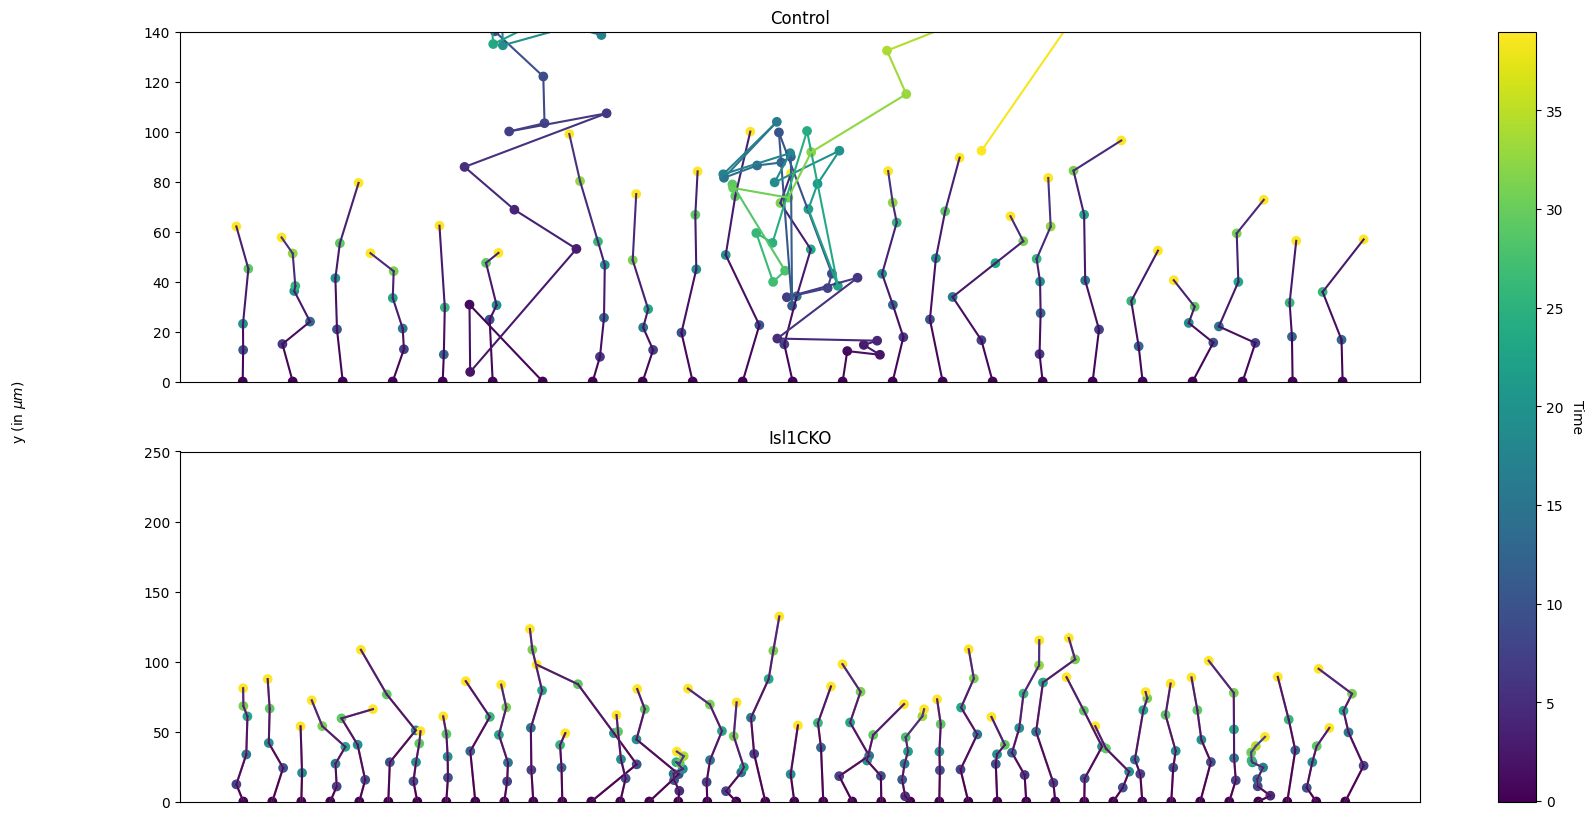

In [29]:
# create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10))
# find max value in times  and set colorbar
max_time = max([max(i) for i in ctrl_times + Isl1CKO_times])
# get all unique Time(sec) values from df
times = df['Time'].unique()
# remove nans from times
times = times[~pd.isnull(times)]
# interpolate times to get 100 values
times = np.interp(np.linspace(0, len(times), 1000), np.arange(len(times)), times)
# create a colorbar
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=[ax1, ax2], values=times)
# # create a colorbar using the max time and 0 as limits and add max time as label
cbar.set_label('Time', rotation=270, labelpad=15)
# plot all arrays in a loop
for i in range(len(rotated_ctrl)):
    # add shift in x axis to make sure all plots are visible
    # ax1.plot(rotated_ctrl[i][:,0] + i * 10, rotated_ctrl[i][:,1], color='lightseagreen')
    # plot times as dots color them according to time
    ax1.scatter(rotated_ctrl[i][:,0] + i * 10, rotated_ctrl[i][:,1], c=ctrl_times[i], cmap='viridis')
    # plot also each part of path with different color
    for j, (start, stop) in enumerate(zip(rotated_ctrl[i][:-1], rotated_ctrl[i][1:])):
        x, y = zip(start, stop)
        # comvert tuple to list
        x = list(x)
        y = list(y)
        # add value of i to x to make sure all plots are visible
        x = [i * 10 + j for j in x]
        color = plt.cm.viridis((ctrl_times[i][j] + ctrl_times[i][j+1])/ (2*max_time))
        ax1.plot(x, y, color=color)
    
    # remove x axis ticks
    ax1.set_xticks([])
    # set y limits to 125
    ax1.set_ylim(0, 140)
    # set subplots label
    ax1.set_title('Control')

for i in range(len(rotated_lsl1CKO)):
    ax2.plot(rotated_lsl1CKO[i][:,0] + i * 10, rotated_lsl1CKO[i][:,1], color='lightcoral')
    ax2.scatter(rotated_lsl1CKO[i][:,0] + i * 10, rotated_lsl1CKO[i][:,1],c=Isl1CKO_times[i], cmap='viridis')

    for j, (start, stop) in enumerate(zip(rotated_lsl1CKO[i][:-1], rotated_lsl1CKO[i][1:])):
        x, y = zip(start, stop)
        # comvert tuple to list
        x = list(x)
        y = list(y)
        # add value of i to x to make sure all plots are visible
        x = [i * 10 + j for j in x]
        # compute color as a color between Isl1CKO_times[i][j] and Isl1CKO_times[i][j+1] normalized by max_time
        color = plt.cm.viridis((Isl1CKO_times[i][j] + Isl1CKO_times[i][j+1])/ (2*max_time))
        ax2.plot(x, y, color=color)

    # remove x axis ticks
    ax2.set_xticks([])
    # set y limits to 125
    ax2.set_ylim(0, 250)
    # set subplots label
    ax2.set_title('Isl1CKO')
# set figure y axis label
fig.text(0.04, 0.5, 'y (in $\mu m$)', va='center', rotation='vertical')
plt.show()